Reetam Dan

E23CSEU0283

In [102]:
#Section 1
#import required librariesimport pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Linear regression library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [103]:
#1. Load the Salary_data dataset.
data = pd.read_csv('Salary_Data.csv')

In [104]:
#2. Display the first 5 rows of the dataset.
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              NaN  43525.0
4              2.2  39891.0


In [105]:
#3. Check for missing values in the dataset.
print(data.isnull().sum())

YearsExperience    3
Salary             2
dtype: int64


In [106]:
#4. Replace missing values in the dataset (if any) with the mean of the respective columns.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [107]:
#5. Display basic statistics like mean, median, and standard deviation for both columns.
print(data.agg(['mean', 'median', 'std']))

        YearsExperience        Salary
mean           5.288889  75773.821429
median         5.094444  66983.500000
std            2.658666  26939.419076


In [108]:
#6. Divide data into 80% train and 20% test split.
X=data['YearsExperience'].values
print(X.shape)

(30,)


In [109]:
x=data['YearsExperience'].values.reshape(-1,1)
y=data['Salary'].values
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

24
6
24
6


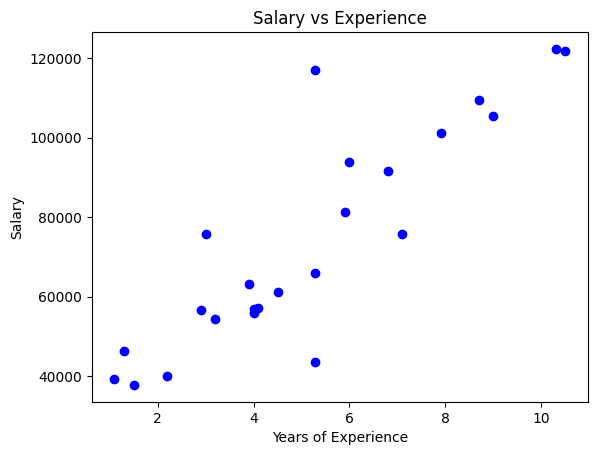

In [111]:
#7. Create a scatter plot showing the relationship between "YearsExperience" (X-axis) and"Salary" (Y-axis) for train split data
plt.scatter(x_train,y_train,color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [112]:
#8. Train a linear regression model without using inbuilt function.
n_train=len(x_train)
numerator_n=n_train*np.sum(x_train.flatten()*y_train)-(np.sum(x_train)*np.sum(y_train))
denomenator_n=(n_train*np.sum(x_train.flatten()**2)-(np.sum(x_train)**2))
n=numerator_n/denomenator_n
b=(np.sum(y_train)-n*np.sum(x_train))/n_train
print(f'Slope(m):    {n}')
print(f'Intercept(b):{b}')

Slope(m):    8902.047443942172
Intercept(b):28013.78767549583


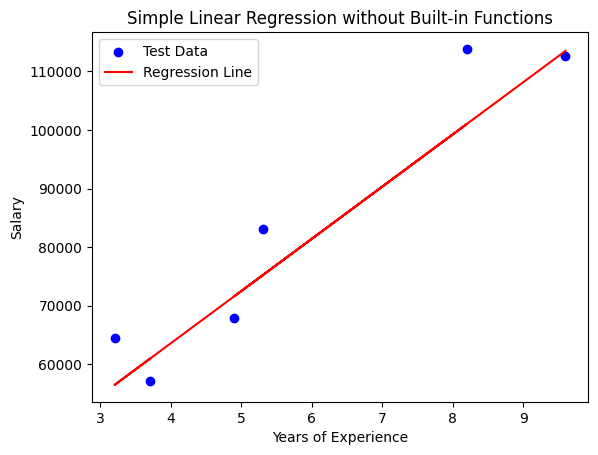

In [113]:
#9. Predict the income for the test dataset using the trained model.
y_pred = n * x_test + b
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression without Built-in Functions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [114]:
#10. Calculate the Mean Squared Error (MSE) and R-squared score for the predictions.

# Calculating R-squared and MSE without using inbuilt functions
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r2_manual = 1 - (ss_residual / ss_total)
mse_manual=np.mean(y_test-y_pred)**2
print(f"R-squared: {r2_manual}")
print(f"Mean Squared Error (MSE): {mse_manual}")
# Calculating Mean Absolute Error (MAE) without using inbuilt functions
mae_manual = np.mean(np.abs(y_test - y_pred))
print(f"\nMean Absolute Error (Manual) - {mae_manual}")

R-squared: -10.166058962079118
Mean Squared Error (MSE): 11495284.734001625

Mean Absolute Error (Manual) - 24421.484337000384


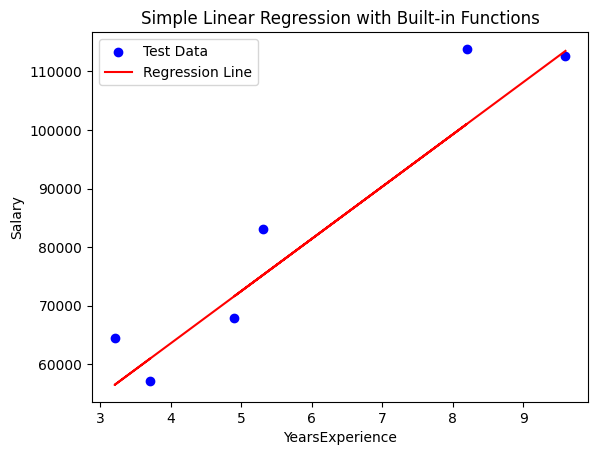

In [115]:
# Section 2
# 1. Train a linear regression model using inbuilt function using train set.
# 2. Predict the income for the test dataset using the trained model.

# Built-in Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression with Built-in Functions')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [116]:
# 3. Calculate the Mean Squared Error (MSE) and R-squared score for the predictions.

# Calculating R-squared and MSE using inbuilt functions
r2_built_in = r2_score(y_test, y_pred)
mse_built_in = mean_squared_error(y_test, y_pred)
print(f"R-squared (Built-in): {r2_built_in}")
print(f"Mean Squared Error (Built-in): {mse_built_in}")
# Calculating Mean Absolute Error (MAE) using inbuilt functions
mae_inbuilt = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) - Inbuilt Model: {mae_inbuilt}")


R-squared (Built-in): 0.8963001863623627
Mean Squared Error (Built-in): 52969444.15645272
Mean Absolute Error (MAE) - Inbuilt Model: 6156.011860985548


In [117]:
# 4. Compare both outcomes from without inbuilt function (section 1) and using inbuilt function.

print(f"Manual Calculation - Mean Squared Error (MSE): {mse_manual}")
print(f"Built-in Function -  Mean Squared Error (MSE): {mse_built_in}")
print(f"\nManual Calculation - R-squared: {r2_manual}")
print(f"Built-in Function -  R-squared: {r2_built_in}")
print(f"\nManual Calculation Mean Absolute Error - {mae_manual}")
print(f"Built-in Function Mean Absolute Error -  {mae_inbuilt}")
#Ans: Both gives same results.
print(f"\nAns: All 3 give same results")


Manual Calculation - Mean Squared Error (MSE): 11495284.734001625
Built-in Function -  Mean Squared Error (MSE): 52969444.15645272

Manual Calculation - R-squared: -10.166058962079118
Built-in Function -  R-squared: 0.8963001863623627

Manual Calculation Mean Absolute Error - 24421.484337000384
Built-in Function Mean Absolute Error -  6156.011860985548

Ans: All 3 give same results
